# Workshop Task - Training models and preprocessing


We have a binary classification problem where we have to predict whether a credit should be approved or not for a new client of a bank.


|Field Name|	Order|	Type (Format)|Description|
| -------| -------|-----------|---------|
|checking_status|	1|	string (default)|Status of existing checking account, in Deutsche Mark.|	
|duration	|2|	number (default)	|Duration in months|
|credit_history	|3|	string (default)	|Credit history (credits taken, paid back duly, delays, critical accounts)|
|purpose	|4|	string (default)	|Purpose of the credit (car, television,…)|
|credit_amount	|5|	number (default)	|Credit amount|
|savings_status	|6|	string (default)	|Status of savings account/bonds, in Deutsche Mark.|
|employment	|7|	string (default)	|Present employment, in number of years.|
|installment_commitment	|8|	number (default)|Installment rate in percentage of disposable income|	
|personal_status	|9|	string (default)|Personal status (married, single,…) and sex|
|other_parties	|10|	string (default)|Other debtors / guarantors|	
|residence_since	|11|	number (default)|Present residence since X years|	
|property_magnitude	|12|	string (default)|Property (e.g. real estate)|	
|age	|13|	number (default)	|Age in years|
|other_payment_plans	|14|	string (default)|Other installment plans (banks, stores)|
|housing	|15|	string (default)	|Housing (rent, own,…)|
|existing_credits	|16|	number (default)|Number of existing credits at this bank|	
|job	|17|	string (default)	|Job|
|num_dependents	|18|	number (default)|Number of people being liable to provide maintenance for|	
|own_telephone	|19|	string (default)|Telephone (yes,no)|	
|foreign_worker	|20|	string (default)|Foreign worker (yes,no)|	
accepted	|21|	string (default)	|Class|


Your task is to : 
  1. Use some EDA techniques we learned the last 2 weeks
  2. Detect missing values
  4. From the seaborn package use the functions displot and boxplot to plot the distributions of the numerical variables. This should give you insight into what scaling type you should use. The boxplots will give a good indication on the presence of outliers.

  5. Scale the data.

  6. For the categorical features try different encodings e.g. target, label... 
    
  7. Make train/test split : with train(70%), test(30%) with random_state = 0

  8. Try to build quickly a few models, a Decision Tree, a Random Forest, a polynomial SVM, a Radial Basis SVM, KNN. Try to achieve performance of 80% + on test set. 
  
  9. Evaluate the model
    
  10. For reproducibility please use random_state on train_test_split and model initialization
  
  11. Write a summary :
    - Which model gives the best result?
    - What can we improve in the future?
    - BONUs: Which encoding give better performance on this dataset?

Bonus:
- Try building a model with only a subset of features. Try any of the feature selection techniques to find the 5 most important features according to each of the methods we learned in the previous week. Write a short summary of the results.
    



In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.metrics import roc_curve, confusion_matrix, classification_report
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [206]:
dataset = pd.read_csv('dataset-workshop.csv')


In [207]:
dataset = dataset.drop(['Unnamed: 0','checking_status','duration','purpose','savings_status',
'personal_status','property_magnitude',
'other_payment_plans','job','own_telephone'], axis=1)

In [208]:
dataset['credit_history'] = dataset['credit_history'].map({'Critical_acct_other_credits_existing':0,'Existing_credits_paid_till_now':1,'Delay_in_past': 2,'None': 3,'No_credits_taken_or_all_paid':4,'All_credits_paid_duly':5})

In [209]:
dataset['employment'] =dataset['employment'].map({'>7yrs':0,'1_to_4yrs':1,'4_to_7yrs':2,'unemployed':3,'<1yr':4})

In [210]:
dataset['other_parties'] = dataset['other_parties'].map({'None':0, 'guarantor':1,'co-applicant':2})

In [211]:
dataset['housing'] = dataset['housing'].map({'own': 0, 'for_free': 1, 'rent':2})

In [212]:
dataset['foreign_worker'] = dataset['foreign_worker'].map({'yes': 0, 'no': 1})

In [213]:
zero_not_accepted = ['age']
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN,mean)

In [214]:
cols = ['credit_amount','age']
for col in cols:
   dataset[col] = dataset[col].apply(lambda x: int(x) if x == x else 0)

In [215]:
train_df, test_df = train_test_split(dataset,test_size=None)

In [216]:
print(train_df.shape)
print(test_df.shape)

(752, 12)
(251, 12)


In [217]:
print(train_df.describe())
print(test_df.describe())

       credit_history  credit_amount  employment  installment_commitment  \
count      752.000000     752.000000  752.000000              752.000000   
mean         1.242021    4507.422872    1.554521                2.992021   
std          1.305500    3614.070503    1.380753                1.101961   
min          0.000000     505.000000    0.000000                1.000000   
25%          0.000000    1916.750000    0.000000                2.000000   
50%          1.000000    3706.500000    1.000000                3.000000   
75%          1.000000    5900.250000    2.000000                4.000000   
max          5.000000   26200.000000    4.000000                4.000000   

       other_parties  residence_since         age     housing  \
count     752.000000       752.000000  752.000000  752.000000   
mean        0.130319         2.857713   35.867021    0.470745   
std         0.442768         1.107880   11.262082    0.778674   
min         0.000000         1.000000   19.000000    0.

In [218]:
X = train_df.drop(columns = ['accepted'])

In [219]:
y = train_df['accepted']

In [220]:
X_train = train_df.drop(columns = ['accepted']).values
X_test = test_df.drop(columns = ['accepted']).values
y_train = train_df['accepted'].values
y_test = test_df['accepted'].values


In [221]:
X_train, X_test,y_train, y_test = train_test_split(X_train,y_train, random_state=0, test_size=0.3, train_size=0.7)

mms = StandardScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test) 

In [222]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 372, 1: 154})
Counter({0: 149, 1: 77})


In [223]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

assert X_train.shape[1] == X_test.shape[1]
assert type(y_train) == type(y_test)

In [224]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (526, 11)
y_train: (526,)
X_test: (226, 11)
y_test: (226,)


In [225]:
print("Whole dataset : ", len(train_df)+len(test_df))
print("X Train size", len(X_train))
print("X Test size", len(X_test))
print("y train size", len(y_train))
print("y test size", len(y_test))

print(X_train.shape)
print(len(X_train))

Whole dataset :  1003
X Train size 526
X Test size 226
y train size 526
y test size 226
(526, 11)
526


In [226]:
X_test[0]
X_train[0]

array([-0.18020224,  4.11498325, -0.41722882, -0.8813241 , -0.28582151,
       -0.7553296 , -0.50560293, -0.61263217, -0.66338499, -0.42664092,
       -0.16535946])

In [227]:
#classifier_rf = RandomForestClassifier(n_estimators=45, random_state=2,criterion='gini', max_depth=7,min_samples_split=2, min_samples_leaf=1) 
classifier_rf = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=5,min_samples_leaf=5,max_features='sqrt',max_leaf_nodes=None)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5)

In [228]:
y_pred_rf = classifier_rf.predict(X_test)

In [229]:
y_pred_rf

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1], dtype=int64)

In [230]:
print("Accuracy for Random Forest:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy for Random Forest: 0.9424778761061947


In [231]:
y_pred_rf

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1], dtype=int64)

In [232]:
y_test

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1], dtype=int64)

In [233]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       149
           1       0.93      0.90      0.91        77

    accuracy                           0.94       226
   macro avg       0.94      0.93      0.94       226
weighted avg       0.94      0.94      0.94       226



In [234]:
accuracy_score(y_train, classifier_rf.predict(X_train))

0.967680608365019

In [235]:
confusion_matrix(y_test, y_pred_rf)

array([[144,   5],
       [  8,  69]], dtype=int64)

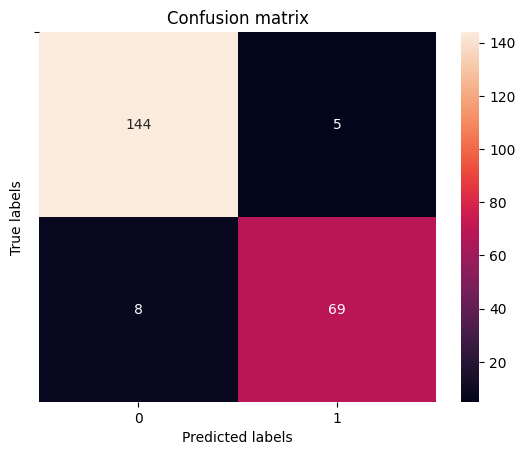

In [236]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d")

plt.yticks(np.arange(1))
plt.ylabel('True labels');
plt.xlabel('Predicted labels');
plt.title('Confusion matrix');

In [237]:
print('Precision_score is:', metrics.precision_score(y_test, y_pred_rf, pos_label=0))
print('recall_score is:', metrics.recall_score(y_test, y_pred_rf, pos_label=0))
print('f1_score_micro is:', metrics.f1_score(y_test, y_pred_rf, average='micro'))
print('f1_score_weighted is:', metrics.f1_score(y_test, y_pred_rf, average='weighted'))

Precision_score is: 0.9473684210526315
recall_score is: 0.9664429530201343
f1_score_micro is: 0.9424778761061947
f1_score_weighted is: 0.9421931193818958


In [238]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       149
           1       0.93      0.90      0.91        77

    accuracy                           0.94       226
   macro avg       0.94      0.93      0.94       226
weighted avg       0.94      0.94      0.94       226



In [239]:
clf = AdaBoostClassifier(n_estimators=100)

In [240]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [241]:
y_pred_ab = clf.predict(X_test)

In [242]:
print("Adaboost acc:",metrics.accuracy_score(y_test, y_pred_ab))

Adaboost acc: 0.9203539823008849


In [243]:
print(classification_report(y_test, y_pred_ab))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       149
           1       0.93      0.83      0.88        77

    accuracy                           0.92       226
   macro avg       0.92      0.90      0.91       226
weighted avg       0.92      0.92      0.92       226



In [244]:
## VASIL STAMENKOSKI